<h1>Assignment 2</h1>
<h3>Foundations of Computational Neuroscience</h3>
<h4>A01732702 Nezih Nieto Gutiérrez</h4>

<h2>Task A</h2>
<p style="text-align: justify">As it is shown in the figures below, the membrane equation can be modelled by a circuit. Yet, there are several models depending on the assertions one may have made about the behaviour of the neural membrane, such models are built just as the following circuits are:</p>
<p style="text-align: center"><img src="index.jpeg" width="500px"><br/>Figure 1. Model for a membrane with no injected current.</p>
<p style="text-align: center"><img src="design.jpeg"><br/>Figure 2. Model for a membrane with injected current.</p>
<p style="text-align: justify">The model shows different elements whose main aim is to depict a real part of the cell. For example: the capacitor (<i>Cm</i>) models the charges inside the cell, the resistor (<i>Rm</i>) models the inverse value of conductance of the ion channels, the value of the electromotive force in equilibrium or rest conditions (<i>Er</i>) of the neuron potential, finally the injected current is modelled with the current source (<i>Iinj</i>) at the second circuit. Thus the measure Vm responds to the membrane potential.</p>
<p style="text-align: justify">In most equations that define the behaviour of the membrane, it is easy to observe the constant <i><b>τm</b></i> mostly given by the product of <i>Cm [nF]</i> and <i>Rm [MΩ]</i>, and refers to a time constant that the membrane circuit shall take to be charged, normally will the membrane charged after 5 times the value of <i>τm [in ms]</i>.When the circuit is to be analysed, it describes a differential system, in this case an linear ODE (ordinary differential equation), whose solution must be obtained step by step as follows:</p>

$$\frac{dV_m}{dt}=-\frac{V_m}{\tau_m}+\frac{R_m \ I_{inj}(t)}{\tau_m}$$
<br/><p>Thus, the differential equation that describes the model can use the following simplification:</p><br/>
$$\frac{dV_m}{dt}=aV_m+\frac{1}{C_m}I_{inj}(t)$$
<br/><p>In order to solve the linear ODE, a method must be chosen, the obvious option, given the form of the equation <i>y'+P(x)y = Q(x)</i> is the so-called integrating factor.</p><br/>
$$\mu \ [\frac{dV_m}{dt}-aV_m]=\mu \ [\frac{1}{C_m}I_{inj}(t)] \ , \ \mu = e^{\int{}{}{adt}}= e^{-at}$$
<br/><br/>
$$e^{-at}[\frac{dV_m}{dt}-aV_m]=e^{-at}[\frac{1}{C_m}I_{inj}(t)]$$
<br/><br/>
$$\int_{t_0}^{t}{e^{-at}[\frac{dV_m}{dt}-aV_m]dt}=\int_{t_0}^{t}{e^{-at}[\frac{1}{C_m}I_{inj}(t)]dt}$$
<br/><p>After integration is done, the very result is:</p><br/>
$$V_m(t)=\frac{R_m\ I_{inj}(t)\ (e^{-at}-e^{-at_0})-V(t_0) \ e^{-at_0}}{e^{-at}}$$
<br/><p>The following reduction must be:</p><br/>
$$V_m(t)= R_m \ I_{inj}(t) \ (1-e^{-a(t_0-t)})-V(t_0) \ e^{-a(t_0-t)}$$
<br/><p>And simplified:</p><br/>
$$V_m(t)= R_m \ I_{inj}(t) \ (1-e^{-\frac{t-t_0}{\tau_m}})-V(t_0) \ e^{-\frac{t-t_0}{\tau_m}}$$

<p style="text-align: justify">Assuming certain conditions for the membrane, the equation could be plotted as:<p>

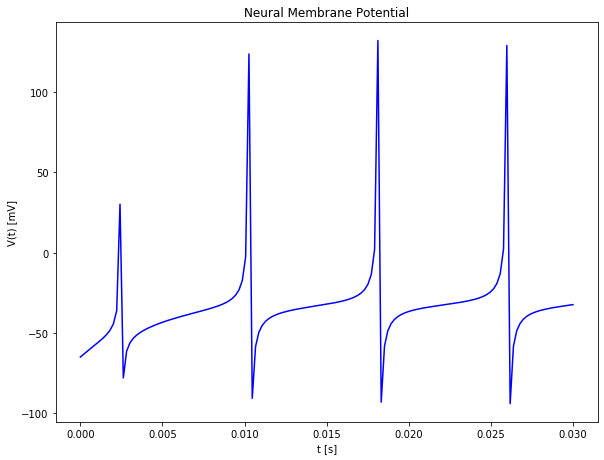

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal 

plt.rcParams["figure.figsize"] = [8.50, 6.50]
plt.rcParams["figure.autolayout"] = True

from pylab import *
import matplotlib.pyplot as plt
import random


v0 =-65
t0 = 0
t = np.linspace(0, 0.03, 150)
R = 20000000
C = 0.0000000002  
tm = R*C
f=(np.tan(400*(t+0.08))-9)
I = 0.00000018*f


v = I*R*(1-np.exp((-t+t0)/tm))+v0*np.exp((-t+t0)/tm)
plt.plot(t, v, color='blue')
plt.title('Neural Membrane Potential')
plt.ylabel('V(t) [mV]')
plt.xlabel('t [s]')
plt.show()


<br/><p style="text-align: center">Figure 3. Neural Membrane Model with a tangent function as an input, to model an aproximation of the synaptic activity, often describing spikes.</p>

<h2>Task B</h2>

<p>Let a first order linear ODE be..<p/>
$$\frac{dx}{dt}=\ ax$$
<br/><p>By using the method of separation of variables (Fourier's Method), it is easy to obtain a primitive for each expression in both terms to satisfy the previous equation:</p><br/>
$$\int_{x_0}^{x}\frac{dx}{x}=\ \int_{t_0}^{t} a \ dt$$
<br/><br/>
$$ln|x|_{x_0}^{x}=\ at \ |_{t_0}^{t} $$
<br/><p>After applying antiexponential properties, the equation will look as shown below:</p><br/>
$$\frac{x}{x_0}=e^{a(t-t_0)}$$
<br/><p>Which can be reordered just like:</p><br/>
$${x}=x_0e^{a(t-t_0)}$$
<br/><p>Where x0 and t0 are the intial conditions of our system and a is a coefficient that describes the exponential change ratio along time. The equation would look as shown below:</p><br/>

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal 

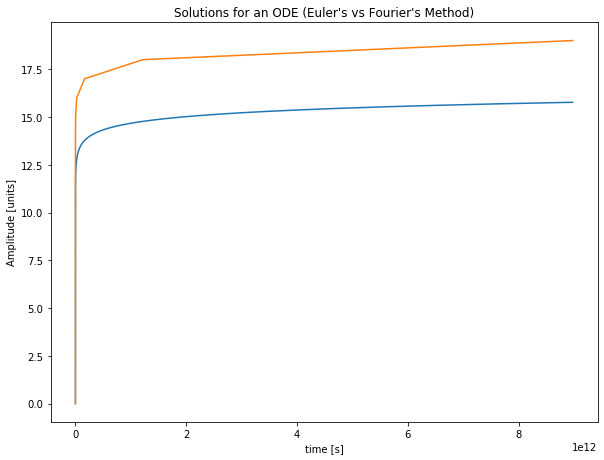

In [14]:
x0=0.18
t0=0
a=2
t = np.linspace(t0, 15.77, 1000)
x=x0*np.exp(a*(t))



nt=19
dt = 0.01
N = np.empty(nt+1)
tn = np.empty(nt+1)
tn[0] = 0
N[0] = x0
for i in range(nt):
   N[i+1] = N[i]+dt*x0*np.exp(a*(tn[i]-t0))
   tn[i+1]=i+1

plt.plot(x,t,N,tn)
plt.title("Solutions for an ODE (Euler's vs Fourier's Method)")
plt.xlabel('time [s]')
plt.ylabel('Amplitude [units]')
plt.show()

<br/><p style="text-align: justify">Figure 4. This plot shows two solutions for the same function, one obtained analytically by Fourier's Method (shown in blue) and the second aproximated numerically by Euler's Method (shown in orange). Defining initial conditions as x0=0.18, t0=0, and a=2. </p>

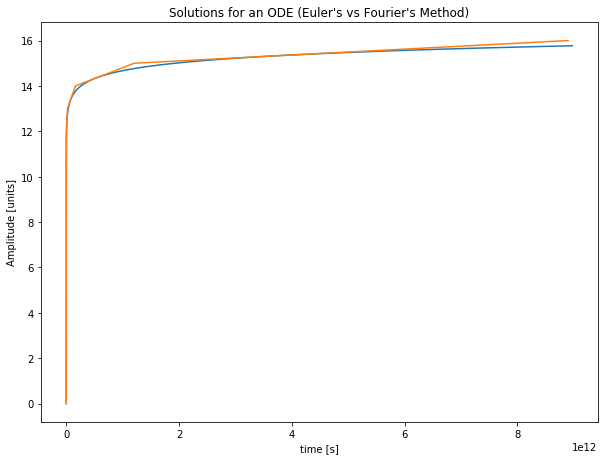

In [15]:
x0=0.18
t0=0
a=2
t = np.linspace(t0, 15.77, 1000)
x=x0*np.exp(a*(t))



nt=16
dt = 4
N = np.empty(nt+1)
tn = np.empty(nt+1)
tn[0] = 0
N[0] = x0
for i in range(nt):
   N[i+1] = N[i]+dt*x0*np.exp(a*(tn[i]-t0))
   tn[i+1]=i+1

plt.plot(x,t,N,tn)
plt.title("Solutions for an ODE (Euler's vs Fourier's Method)")
plt.xlabel('time [s]')
plt.ylabel('Amplitude [units]')
plt.show()

<br/><p style="text-align: center">Figure 5. This plot shows two solutions for the same function, one obtained analytically by Fourier's Method (shown in blue) and the second aproximated numerically by Euler's Method (shown in orange). Compared to the previous graph, the step size was altered in the Euler's Method and also the number of iterations, so the modelled ODEs values may behave divergently to the infinity, which increases the errror for higher values.</p>

<h2>Task C</h2>
<p style="text-align: justify">Let the molar concentration be defined as the number of mol in certain substance (1 mol = 6.02214076 E23 molecules) devided by the volume in litres of solution:</p><br/>
$$M = \frac{[S_x]}{V_{substance}} \frac{mol}{L}$$<br/>
<p style="text-align: justify">For example, the number of molecules of 12.5 L of a sodium chloride 10mM solution could be seen as:</p><br/>
$$10 mM = \frac{[Na⁺Cl^{-}]}{12.5} \frac{mol}{L}$$<br/>

$$(12.5)(10) [L\ mM] = [Na⁺Cl^{-}]\ mol$$<br/>
<p style="text-align: justify">So this value must be multiplied by Avogadro's Constant, so that the right number of molecules is obtained:</p><br/>
$$[Na⁺Cl^{-}] = (12.5)(10\ E{-03})(6.02214076\ E{23}) \frac{L\ M}{mol}$$<br/>

$$[Na⁺Cl^{-}] = 7.52767595\ E22 \ Sodium\ Chloride\ Molecules $$<br/>

<br/>
<p style="text-align: justify">Other constraints to be considered in membrane are the reversal potentials, that are moestly defined by the Nernst Equation, that is defined as:</p>
<br/>
$$ E_s = V_2 - V_1 = \frac{RT}{ZF}\ ln(\frac{[S_{in}]}{[S_{out}]})$$
<br/>
<p style="text-align: justify">For example, given the following values for in vivo conditions:</p>
<br/>
$$\frac{R}{F}=8.617\ E -05, Z=1,\ and\ T=38°C=311\ K$$
<br/>
<p style="text-align: justify">The reversal potential for internal and external [K+] concentrations 125 mM and 32 mM respectively should be obtained as:</p>
<br/>
$$ E_s = [8.617\ E -05][311]\ ln(\frac{32}{125}) = -36.52\ mV$$<br/>
<p style="text-align: justify">In case a membrane had an internal [Na+] concentration of 18 mM at room temperature (25°C/298 K), and also a reversal potential of 55mV, the model would look like the following equation:</p>
<br/>
$$ E_Na = [8.617\ E -05][298]\ ln(\frac{18mM}{[Na^{+}_{out}]}) = 55\ mV$$
<br/>
<p style="text-align: justify">As it is the interest of the example to know the external concentration, the equation must be reordered as:</p>
<br/>
$$[Na^{+}_{out}] = 18 e^{-\frac{55\ E-03}{(8.617\ E -05)(298)}}\ mM\ = 2.1138\ mM$$
<br/>

<p style="text-align: justify">Finally, every reversal potential aims to model a pump or a set thereof, which means that, depending of the concentration of ions, the currents that trespass the membrane are to have different values. Such potentials can be modelled as voltage sources, and the currents shall be delayed by the conductance (inverse of the resistance). The total conductance of the membrane must be defined as the arithmetic sum of each current conductance:</p>

<br/>
$$g_m = \Sigma_{i}^{n} g_{[i^{+-}]}$$
<br/>

<p style="text-align: justify">So, to exemplify this phenomenon, let a membrane support three currents such as the conductances are 0.5 E-08 S, 0.9 E-08 S, 1.8 E-08 S. The total conductance shall be:</p><br/>
$$g_m = [0.5+0.9+1.8] E-08 S = 0.032\ \mu S$$
<p style="text-align: justify">Finally, it can be deduce that the resistance of the membrane will be calculated as:<p>
$$R_m = \frac{1}{g_m} = \frac{1}{0.032\ \mu S}= 31.25\ M\Omega $$


<h2>Task D</h2>
<p style="text-align: justify" >In task A, a model to get the membrane equation was proposed, nonetheless eal neurons exhibit temporal dynamics that are captured by differential equations and systems thereof. One family of such models is the so-called integrate-and-fire models. Two famous models that are quite related to each other are the LIF (Leaky Integrate-And-Fire) and the Poisson Neural Models.</p>
<p style="text-align: justify">When discussing the LIF model, it is important to understand that its very behaviour aims to model the required energy to pass a treshold, wich is originated by an amount of graded potentials, that after being temporally added, they fire the neuron action potential, which means that the membrane was fully charged, so it can fire a pulse that will allow in a pre-synaptic cell to reach through an axon the next neuron or post-synaptic cell, that also will be charged and behave as a pre-synaptic cell for the next synapsis.</p>
<p style="text-align: justify">The current that is thus injected in the membrane could be an addition of impulses, so it would be easy to observe that after receiving several impulses from different synapses, the spike will generate the action potential, that involves a temporal analysis of energy and matter balance between the membran external and internal ionic concentrations. Hence the name integrated, since every received spike is integrated into the response of the post-synaptic cell.</p>
<p style="text-align: center"><img src="LIF.png"><br/>Figure 6. Leaky Integrate-and-Fire as a block diagram, from left to right integration, then the firing of the action potential and finally the post-synaptic spike generation activity. </p>
<p style="text-align: justify">Poisson Neuron Model provides the instantaneous firing rate; i.e. the instantaneous probability of firing at any instant, and the output is a stochastic function of the input. Unlike the LIF Model, he Poisson Model does not use the noise per se, yet it takes every input as a part of the probability function. In part because of it simplicity, the model is widely used especially in in vivo single unit electrophysiological studies.</p>
<p style="text-align: center"><img src="poisson.png"><br/>Figure 7. Poisson Spike Model as a Poisson Distribution that shows how the spikes are added arithmetically in time, so that the distribution in C can be understood as the post-synaptic activity time response.</p>

<p style="text-align: justify">The main link between these two models is that in the LIF model the output is a filtered function of the inputs after reaches a threshold, and will be reset to its initial value. By contrast, the Poisson model is a non-deterministic function of the input. Although the integrate-and-fire model is an approximated depiction of what could be real neural dynamics in a controlled environment, it captures many of the qualitative features, and works fine to conceptualise the electrophysiological behaviour of the neurons.</p>

<table class="default">
    <tr>
     <td><b>Model</b></td>
     <td><i>LIF</i></td>
     <td><i>Poisson</i></td>
    </tr>
  <tr>
    <td><b>Determinism</b></td>   
    <td>Deterministic</td>
    <td>Stochastic</td>
  </tr>
  <tr>
    <td><b>Conceptualisation</b></td>
    <td>Affordable</td>
    <td>Complex</td>
  </tr>
  <tr>
    <td><b>Accuracy</b></td>
    <td>Better for controlled systems</td>
    <td>Better for single units</td>
  </tr>
  <tr>
  <td><b>Adaptability</b></td>
  <td>Flexible</td>
  <td>Robust</td>
  </tr>
  <tr>
  <td><b>Spatial Analysis</b></td>
  <td>Limited</td>
  <td>Scalable</td>
  </tr>
</table>
<p style="text-align: center">Table 1. This is a comparison table between the Poisson Model and the LIF Model, where certain advantages and disadvantages were considered, such as Determinism (involving predictability for any kind of trials), Conceptualisation (meaning how easy anybody can achieve a vague comprehension of the model, considering previous required knowledge), Accuracy (measuring how reliable the depiction of real neuron behaviour is), Adaptability (LIF models are more extensive, since they depend of a variation of conditions to be defined; these models can be depicted as electrical circuits as well), and Spatial Analysis (when speaking of non-linear systems, Poisson Model is easier to analyse, since it is defined as a probability matrix).</p>
<h4>References</h4>
<p style="text-align: justify">
<ol>
<li>Koyama, S., & Kass, R. E. (2008). Spike train probability models for stimulus-driven leaky integrate-and-fire neurons. Neural computation, 20(7), 1776–1795. https://doi.org/10.1162/neco.2008.06-07-540</li>
<li>Softky, W. and Koch, C. (1993). The highly irregular firing of cortical cells is
inconsistent with temporal integration of random epsps. J. Neuroscience . ,
13:334-350.</li>
<li>C Allen and C F Stevens. An evaluation of causes for unreliability of synaptic transmission. Proc.
Natl. Acad. Sci., 91:10380–10383, 1994</li>
<li>Lapicque, L. (1907). Recherches quantitatives sur l'excitation electrique des nerfs traitee comme une polarization. J. Physiol. Pathol. Gen., 9:620-635.</li>
<li>Stein, R. B. (1965). A theoretical analysis of neuronal variability. Biophys. J., 5:173-194.</li>
<li>Ermentrout, G. B. (1996). Type I membranes, phase resetting curves, and synchrony. 
Neural Computation, 8(5):979-1001.</li>
<li>Fourcaud-Trocme, N., Hansel, D., van Vreeswijk, C., and Brunel, N. (2003). How spike generation mechanisms determine the neuronal response to fluctuating input. 
J. Neuroscience, 23:11628-11640.</li>
<li>Badel, L., Lefort, S., Berger, T., Petersen, C., Gerstner, W., and Richardson, M. (2008). Biological Cybernetics,  99(4-5):361-370.</li>
<li>Latham, P. E., Richmond, B., Nelson, P., and Nirenberg, S. (2000). Intrinsic dynamics in neuronal networks. I. Theory. J. Neurophysiology, 83:808-827.</li>
<li>F Rieke, D Warland, R de Ruyter van Steveninck, and W Bialek. Spikes: Exploring the Neural
Code. MIT Press, Cambridge, MA, 199</li>
</ol>
</p>
<h2>Task E</h2>
<p style="text-align: justify">As every student should remember, the Membrane Potential is measured for it is a phenomenon in the interest of neuroscientists. Depending on the values of the membrane potential, synapses generate the brain activity, known as action potentials, the Na+/K+ (Natrium-Kalium) Pump is activated to mantain the equilibrium or resting potential, following the conservation pinciple. In the steady state of the mambrane, the membrane potential might be oscillating around the -65 mV, but may also become stable if an input were constant. That is to say, the equilibrium is accomplished after a negative polarisation; so, when an input alters the resting potential, the membrane potential tends to stabilise  nonetheless, given the fact that the inputs are mainly spikes generated by pre-synaptic cells, the post-synaptic response after a membrane potential is altered, must behave seemingly alike, with a depolarisation so the membrane reaches equilibrium conditions.</p>
<p style="text-align: center"><img src="mempot.jpg"><br/>Figure 8. Post-synaptic Potential representation in terms of the spike inputs. This illustration presents how the pumps behave in response to time-distributed inputs.</p>

<p style="text-align: justify">Thus the action potential (normally analysed as the PSP) should have the following representation in time:</p><p style="text-align: center"><img src="actpot.png"><br/>Figure 9. Post-synaptic Potential representation in terms of the output and its phases. This illustration presents how the membrane potential behave in response to graded potentials.</p>